# Алфа-бета филтер

Очекувано време за сработување: 1 ден од 8 часа.

In [25]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd

## Референци

- [Алфа-бета филтер на Википедија](https://en.wikipedia.org/wiki/Alpha_beta_filter)
- [Јупитер тетратка од Роџер Лабе](https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/01-g-h-filter.ipynb)
- [Галерија виџети од библиотеката ipywidgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

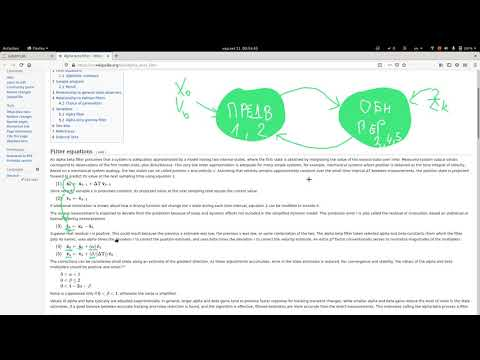

In [26]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('-nTFPAn-OoM')

In [3]:
def alpha_beta_filter(measurements, x, v, alpha, beta, dt=1):
    """
    Calculates the belief state utilizing the alpha-beta filter.
    
    Args:
        x: initial position
        v: initial velocity
        alpha: coefficient
        beta: coefficient
        dt: period between measurements
    
    Returns:
        logs: an array of recorded values
    """
    logs = []
#     TODO Имплементирајте го кодот за алфа-бета филтерот и вратете го верувањето
    return np.array(logs)

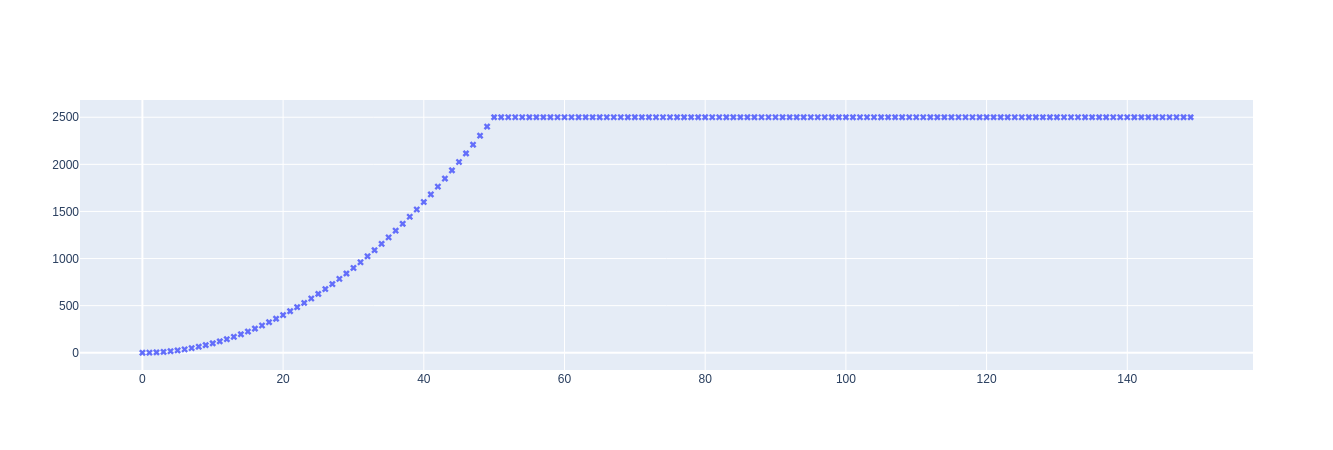

In [14]:
measurements = np.array([x**2 for x in range(50)] + [50**2]*100, dtype=float)
noise_std = 0
noise = np.random.randn(*measurements.shape)
go.Figure([go.Scatter(y=measurements+noise_std*noise, mode='markers', marker=dict(symbol='x', size=6), name='Мерење')])

In [15]:
dt = 1
x_initial = 100
v_initial = -40

logs = alpha_beta_filter(measurements+noise_std*noise, x=x_initial, v=v_initial, alpha=0.2, beta=0.1, dt=dt)
x, x_hat = logs.T

fig = go.FigureWidget([
    go.Scatter(y=measurements+noise_std*noise, mode='markers', marker=dict(symbol='x', size=6), name='Мерење'),
    go.Scatter(y=x_hat, name='Предвидување'),
    go.Scatter(y=x, name='Верување'),
])
fig

FigureWidget({
    'data': [{'marker': {'size': 6, 'symbol': 'x'},
              'mode': 'markers',
          …

In [11]:
@widgets.interact(x_initial=(-10000, 10000, 100), v_initial=(-100, 100, 1), alpha=(0, 1, 0.01), beta=(0, 1, 0.01), noise_std=(0, 500, 10))
def playground(x_initial, v_initial, alpha, beta, noise_std):
    logs = alpha_beta_filter(measurements+noise_std*noise, x=x_initial, v=v_initial, alpha=alpha, beta=beta, dt=dt)
    x, x_hat = logs.T
    with fig.batch_update():
        fig.data[0].y = measurements + noise_std * noise
        fig.data[1].y = x_hat
        fig.data[2].y = x

interactive(children=(IntSlider(value=0, description='x_initial', max=10000, min=-10000, step=100), IntSlider(…

## Задачи на кои треба да одговорите

1. Разгледајте ги функциите во модулот random на библиотеката numpy.
1. Дополнете ја функцијата `alpha_beta_filter()`.
1. Разгледајте ја галеријата виџети на ipywidgets.
1. Како влијае алфа?
1. Како влијае бета?
1. Што ако има многу шум? Колку многу е тоа многу?
1. Што ако имаме лоши претпоставки за состојбите?
1. Покажете пример каде лесно се гледа дека алфа-бета не може да следи променлива која забрзува.
1. Што е тоа алфа-бета-гама филтер? Што е разликата со алфа-бета?
1. Дадени ви се податоци за притисок од водоводот во Ресен. Дизајнирајте алфа-бета филтер за следење на состојбата на притисокот со текот на времето. Крајниот резултат кој се бара е график каде се претставени верувањето за притисокот и брзината со која се менува притисокот. Може да се и на различен график овие две состојбени променливи.

In [7]:
df = pd.read_csv('data/resen/ID7_1F.csv')
df

Datetime      ADC        mA       Bar
0    19-11-13 14:17:21  11429.0  9.058513  3.161571
1    19-11-13 14:18:21  11291.0  8.949136  3.093210
2    19-11-13 14:19:21  11499.0  9.113994  3.196246
3    19-11-13 14:20:21  11398.0  9.033943  3.146214
4    19-11-13 14:21:20  11510.0  9.122713  3.201696
..                 ...      ...       ...       ...
991  19-11-14 07:09:28  12053.0  9.553089  3.470681
992  19-11-14 07:10:28  11884.0  9.419142  3.386963
993  19-11-14 07:11:28  12063.0  9.561015  3.475635
994  19-11-14 07:12:28  11750.0  9.312934  3.320584
995  19-11-14 07:22:02  12006.0  9.515838  3.447398

[996 rows x 4 columns]

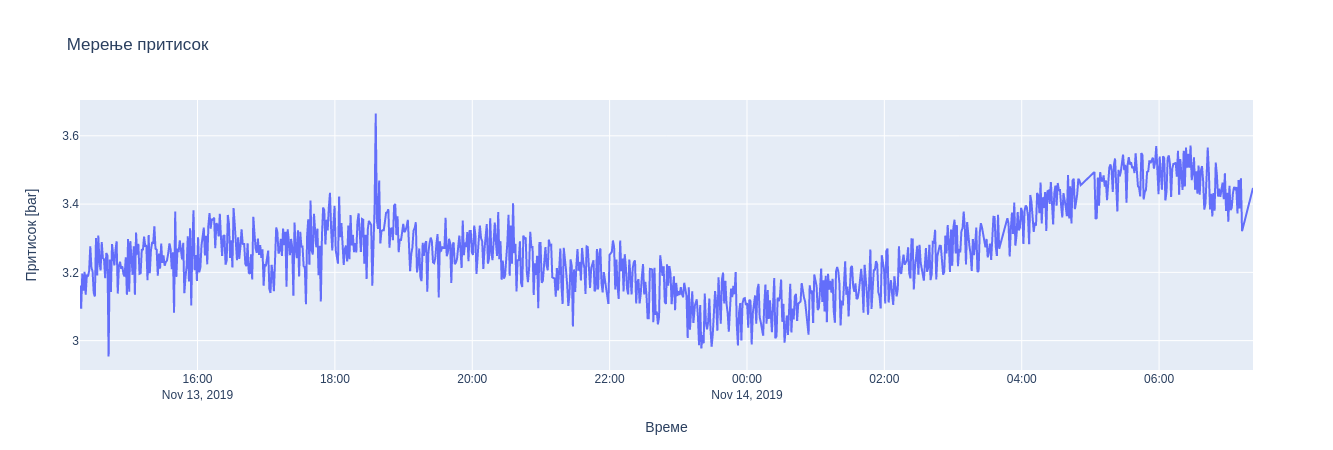

In [8]:
layout = go.Layout(title='Мерење притисок', xaxis=dict(title='Време'), yaxis=dict(title='Притисок [bar]'))
go.Figure(go.Scatter(x=df['Datetime'], y=df['Bar'], name='Притисок'), layout=layout)

## Решение

In [27]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('7o4gAJXgyPc')